In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ecommerce.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Target, NonTarget Define

In [3]:
target_feature = 'Reached.on.Time_Y.N' # resulting target
target_range = [0,1] # range of target, socre 0 ~ 1
other_feature = ['Warehouse_block', 
                'Mode_of_Shipment',
                'Customer_care_calls',
                'Customer_rating',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Product_importance',
                'Gender',
                'Discount_offered',
                'Weight_in_gms'
                 ]

### Drop Outlier

In [4]:
# def : drop outlier algorithms
# Input : feature of dataframe
# return : index of outlier, type numpy array 
def IQR(data) :
    q1 = np.percentile(data, 25) # percentile : what is the value on 25 percent
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    low_outlier = q1 - (iqr*1.5)
    high_outlier = q3 + (iqr*1.5)
    index = np.where((data > high_outlier) | (data < low_outlier))
    print('IQR : ', iqr)
    print('Low outlier : ' , low_outlier)
    print('High outlier : ', high_outlier)
    
    return index

In [5]:
# find outlier of discount offered
Discount_offered_outlier_index = IQR(data['Discount_offered'])[0] # [0] is important
Discount_offered_outlier_index

IQR :  6.0
Low outlier :  -5.0
High outlier :  19.0


array([   0,    1,    2, ..., 3131, 3132, 3133], dtype=int64)

In [6]:
#data.drop(index = Discount_offered_outlier_index, inplace = True) # drop outlier
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [7]:
# def : make histogram number of feature value according to each categorical target feature
# input : target feature, features without target, target range, whole dataframe
# 
def makehist_countft_bytg(tg_name,ft_name,tg_range,data):
    fig, axes = plt.subplots(1, len(tg_range),sharex = True, sharey = True, figsize=(22,5)) #make fig    
    fig.suptitle(ft_name)
    axes_cnt = 0
    for i in tg_range:
        data_per_target = data[data[tg_name] == i]
        data_per_target = data_per_target[ft_name] 
        axes[axes_cnt].hist(data_per_target, bins = 10)
        axes[axes_cnt].grid(True)
        axes[axes_cnt].set_title(tg_name +" = " + str(i))
        axes_cnt = axes_cnt + 1
    plt.show()

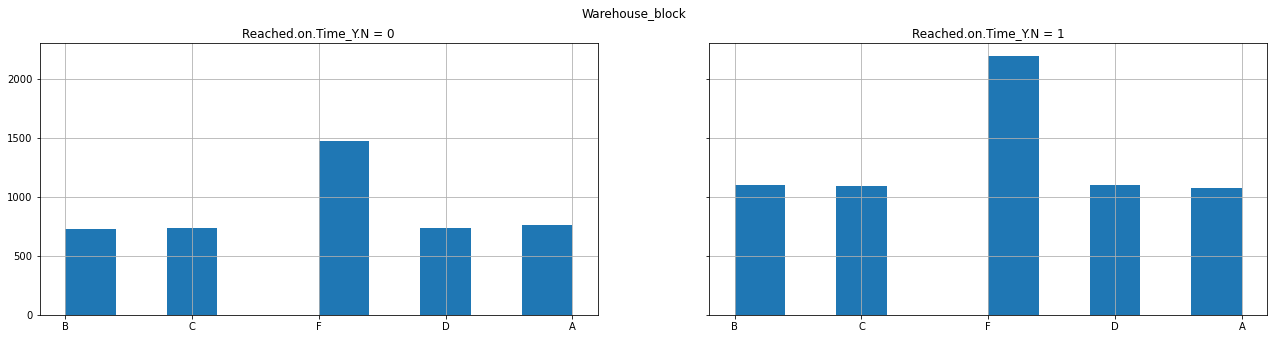

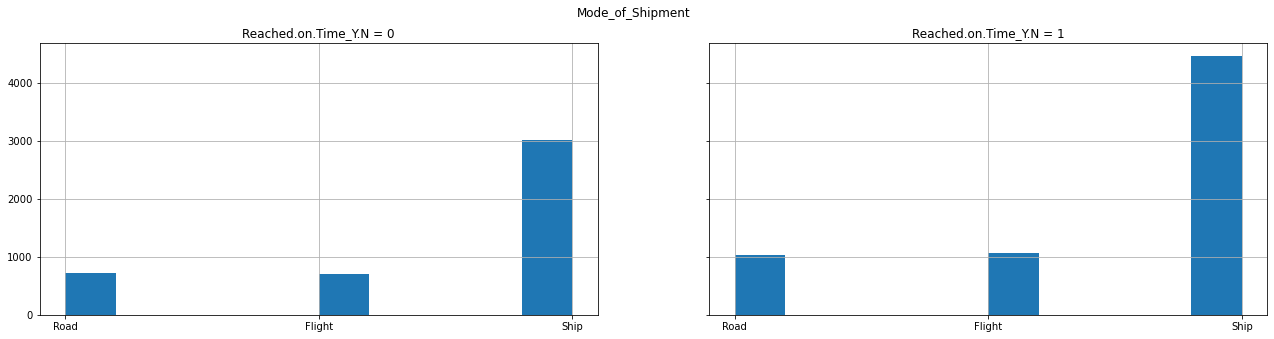

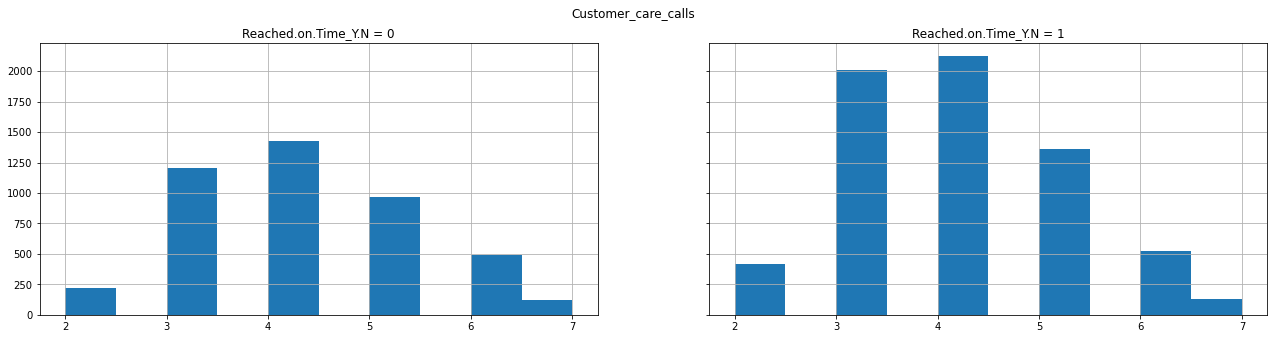

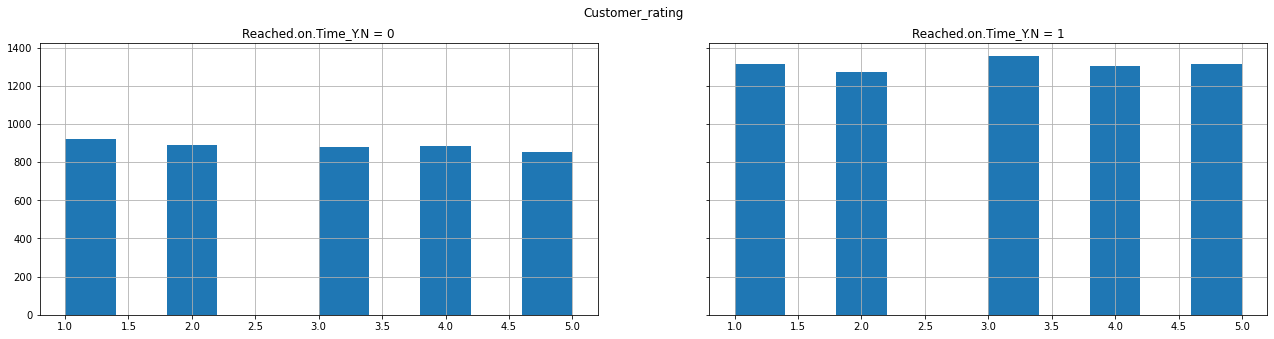

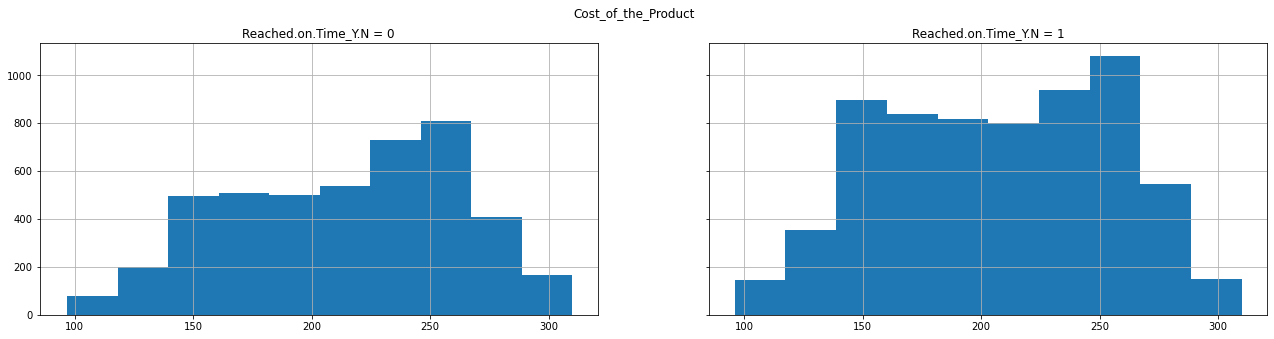

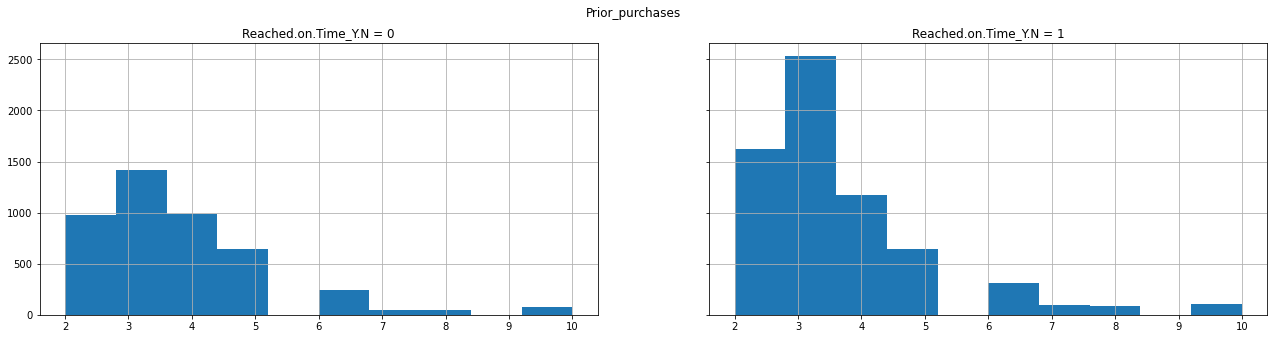

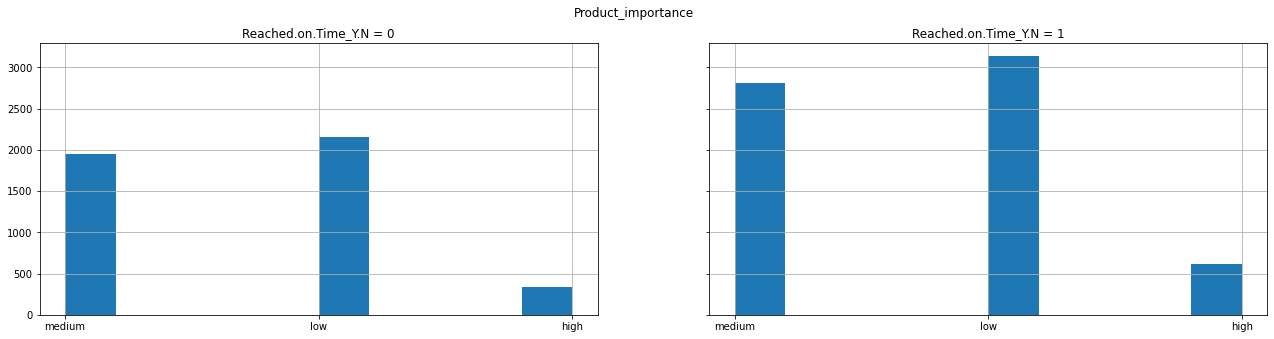

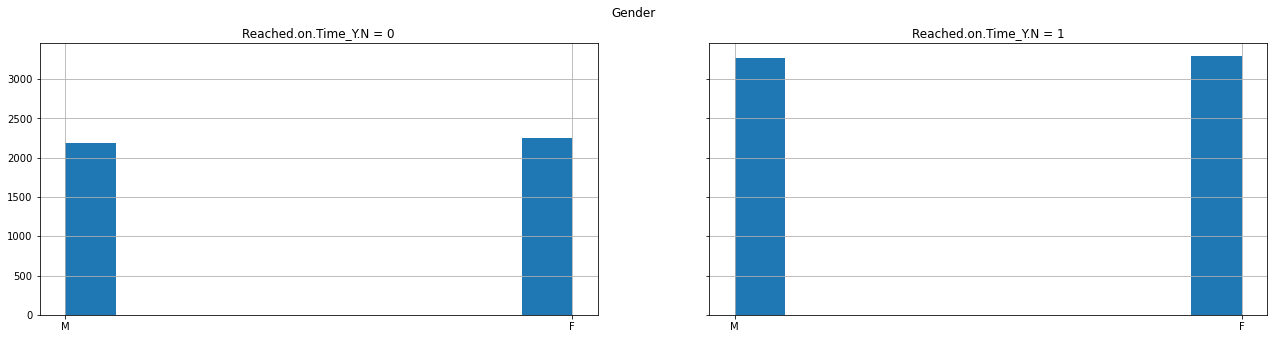

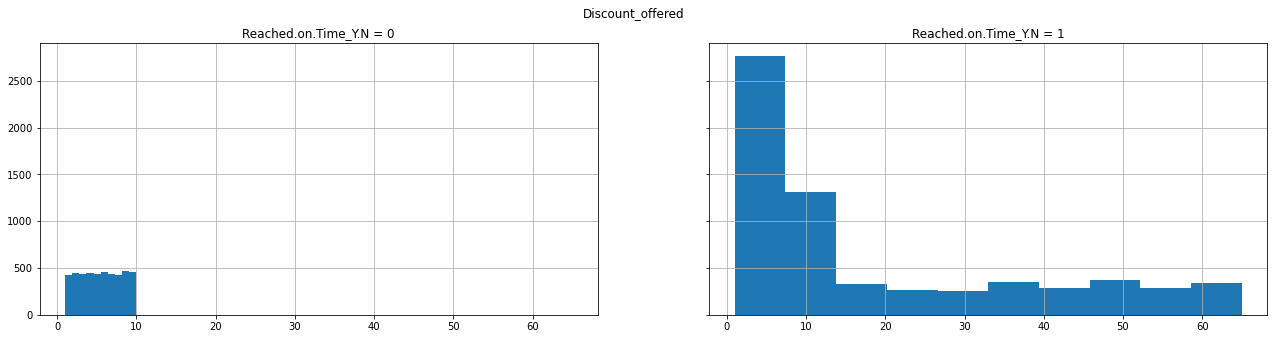

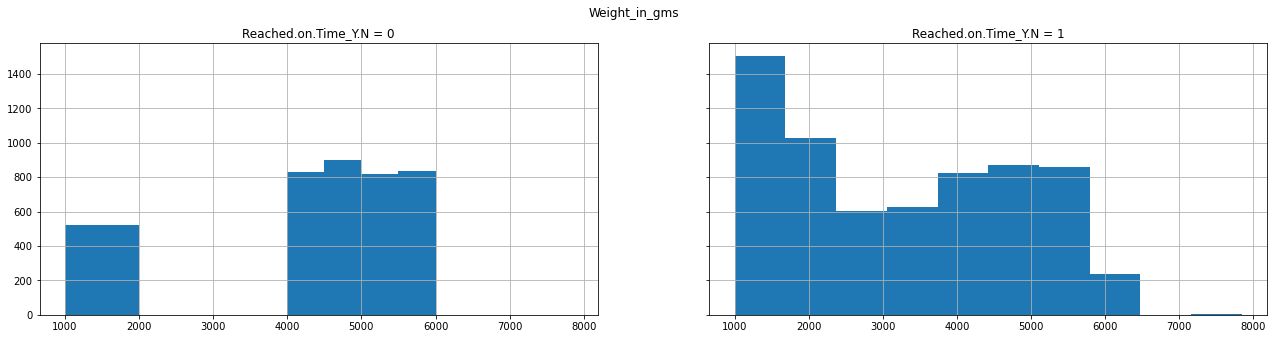

In [8]:
for i in other_feature:
    makehist_countft_bytg(target_feature,i,target_range,data)

### Correlation

### Change Categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
cateogical_feature_name = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for feature_name in cateogical_feature_name:
    data[feature_name] = label_encoder.fit_transform(data[feature_name])
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


# Scailing def (Modified)

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [12]:
#drop not using features
drop_f = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Gender']
#data = data.drop(drop_f, axis=1)

In [13]:
y = data[target_feature]
X = data.drop(target_feature, axis=1)

In [14]:
#test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
2400,2401,3,2,2,5,171,3,2,0,13,1101
5559,5560,1,2,4,1,144,4,2,1,6,5197
1143,1144,1,2,3,3,224,2,1,0,37,3220
7699,7700,4,2,2,1,149,4,2,0,7,5434
5731,5732,4,1,3,4,191,5,2,0,4,4243
...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,2,1,3,5,275,2,1,0,7,4619
5191,5192,4,1,5,5,187,4,2,0,9,5326
5390,5391,0,2,4,2,137,2,2,0,2,5804
860,861,0,2,5,3,144,6,2,0,35,1009


In [16]:
# def : scaling data using Standard, minmax, robust
# input : target of scaling feature
# return : dataframe after scaling
def Scaling(X_train, X_test):
    std_Scaler = preprocessing.StandardScaler()
    scaled_train = pd.DataFrame(std_Scaler.fit_transform(X_train))
    scaled_test = pd.DataFrame(std_Scaler.transform(X_test))
    
    mam_Scaler = preprocessing.MinMaxScaler()
    scaled_train_m = pd.DataFrame(mam_Scaler.fit_transform(X_train))
    scaled_test_m = pd.DataFrame(mam_Scaler.transform(X_test))
    
    rb_Scaler = preprocessing.RobustScaler()
    scaled_train_r = pd.DataFrame(rb_Scaler.fit_transform(X_train))
    scaled_test_r = pd.DataFrame(rb_Scaler.transform(X_test))
    
    return scaled_train, scaled_test, scaled_train_m, scaled_test_m, scaled_train_r, scaled_test_r

In [17]:
std_X_train, std_X_test, mm_X_train, mm_X_test, r_X_train, r_X_test = Scaling(X_train, X_test)

In [18]:
std_X_test

,0,1,2,3,4,5,6,7,8,9,10
0,-1.705616,1.116435,0.639955,-0.064123,1.422799,0.109889,-0.386036,-2.136059,1.000950,0.788716,-0.960469
1,0.024791,-1.571252,-0.677316,-0.934337,-1.413945,0.192563,-0.386036,-0.551061,-0.999051,-0.451730,1.186132
2,0.467248,1.116435,-1.994586,-0.934337,-0.704759,0.089220,0.266568,-0.551061,-0.999051,-0.637797,0.252827
3,-0.482946,0.444513,-1.994586,0.806090,-1.413945,-1.047546,0.919172,-0.551061,-0.999051,-0.761841,0.637129
4,-0.758260,-0.899330,0.639955,0.806090,0.713613,0.378579,-1.038640,1.033938,-0.999051,1.905117,-0.737208
...,...,...,...,...,...,...,...,...,...,...,...
3625,-1.685117,-0.227408,0.639955,-0.934337,0.713613,-1.295568,-0.386036,-0.551061,1.000950,2.649384,-1.267301
3626,-1.537842,-0.899330,0.639955,-0.934337,0.713613,0.750612,0.266568,-0.551061,1.000950,2.835451,-0.420006
3627,-0.353331,-0.899330,-1.994586,-0.064123,0.004427,-1.274899,-0.386036,1.033938,-0.999051,-0.637797,0.703619
3628,-1.081194,1.116435,0.639955,-0.064123,-0.704759,-1.791611,-1.038640,1.033938,1.000950,2.277250,-1.241681


# Decision tree - gini

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV

In [76]:
# make & print decision tree
def decision_tree_gini(X_train, y_train, X_test, y_test):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy().reshape(-1, 1)
    y_test = y_test.to_numpy().reshape(-1, 1)
    
    # Random Search
    decision = DecisionTreeClassifier(criterion='gini')
    clf = RandomizedSearchCV(decision, {'max_depth': range(2,12)}, cv=5)
    clf = clf.fit(X_train, y_train)
    
    #print test score
    print('test score:', clf.score(X_test, y_test))
    y_test_pre = clf.predict(X_test)
    #confusion_matrix(y_test.flatten(), y_test_pre)
    plot_roc_curve(y_test.flatten(), y_test_pre)
    
    #print tree
    #plot_tree(clf.best_estimator_)

In [77]:
import seaborn as sns

def confusion_matrix(y_Actual, y_Predicted):
    print(y_Actual, y_Predicted)
    confusion_matrix = pd.crosstab(y_Actual,  y_Predicted, rownames=['Actual'],  colnames=['Predicted'], margins=True)
    sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [78]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_Actual, y_Predicted):
    fper, tper, thresholds = roc_curve(y_Actual, y_Predicted)
    
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

test score: 0.6911845730027548


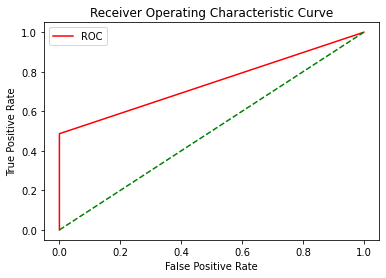

In [79]:
# use standard scaled data
decision_tree_gini(std_X_train, y_train, std_X_test, y_test)

test score: 0.6911845730027548
[1 1 0 ... 1 1 1] [1 0 0 ... 0 1 1]


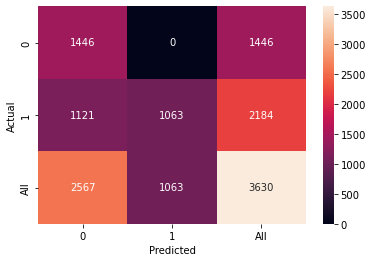

In [70]:
# use minmax scaled data
decision_tree_gini(mm_X_train, y_train, mm_X_test, y_test)

test score: 0.6911845730027548
[1 1 0 ... 1 1 1] [1 0 0 ... 0 1 1]


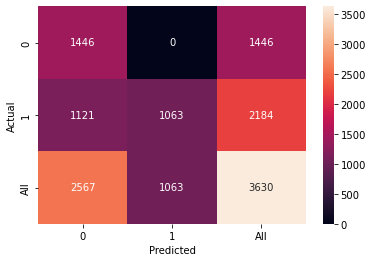

In [71]:
# use robust scaled data
decision_tree_gini(r_X_train, y_train, r_X_test, y_test)

# Random forest test

In [24]:
from sklearn.ensemble import RandomForestClassifier
# make & print random froest classifier
def random_forest(X_train, y_train, X_test, y_test):    
    # Random Search
    rf = RandomForestClassifier()
    clf = RandomizedSearchCV(rf, {'max_depth': range(2,12)})
    clf = clf.fit(X_train, y_train)
    
    #print test score
    print('test score:', clf.score(X_test, y_test))

In [25]:
random_forest(std_X_train, y_train, std_X_test, y_test)

test score: 0.6881542699724518
